In [1]:
!jt -t onedork

# Anomaly Based Network Intrution Detection Module based on Long Short Term Memory Algorithm

An anomaly NID (Network Intrusion Detection) module is an artificial intelligence system designed to detect and flag anomalous network traffic behavior. In this particular project, SVM (Long Short Term Memory) will be used as a tool to visualize the network traffic data and provide a more intuitive and user-friendly interface for analyzing the results.

The dataset used in this project is CSE-CIC-IDS 2018 (02-20-2018), which is a publicly available dataset for network intrusion detection research. This dataset includes a large volume of network traffic data captured from a realistic environment, along with labeled examples of normal and anomalous traffic behavior.

By leveraging the power of SSVM and AI, this project aims to provide an effective and efficient tool for identifying network anomalies and securing critical network infrastructures against potential attacks.

# Import necessary modules

In [2]:
import pandas as pd
from glob import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, f1_score 
from sklearn.svm import SVC

#if the package are not installed run following command
#pip install pandas numpy matplotlib seaborn scikit-learn

# Import dataset 

The CSE-CIC-IDS 2018 dataset is a collection of over 2.8 million network traffic records created by the Canadian Institute for Cybersecurity. It contains both normal and malicious traffic, including ten different types of network attacks. This dataset is used to train and test intrusion detection systems and machine learning models to detect network attacks.


To download the CSE-CIC-IDS 2018 dataset use this link: https://www.kaggle.com/datasets/solarmainframe/ids-intrusion-csv

I am using the 02-20-2018.csv file for this project as data_4.csv.

In [3]:
df = pd.read_csv("data_4.csv") #CSE-CIC-IDS 2018 (02-20-2018)
df

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.31.69.25-94.231.103.172-22-45498-6,94.231.103.172,45498,172.31.69.25,22,6,20/02/2018 08:34:07,888751,11,11,...,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
1,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:33:22,112642816,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,7.071068,56300000.0,56300000.0,Benign
2,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:36:11,112642712,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,18.384776,56300000.0,56300000.0,Benign
3,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:39:00,112642648,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,5.656854,56300000.0,56300000.0,Benign
4,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:41:49,112642702,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,65.053824,56300000.0,56300000.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7948743,172.31.69.7-185.2.197.19-623-42801-6,185.2.197.19,42801,172.31.69.7,623,6,20/02/2018 01:41:45,94042,2,1,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
7948744,172.31.69.7-195.22.125.42-22-2178-6,195.22.125.42,2178,172.31.69.7,22,6,20/02/2018 11:51:06,251281,4,2,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
7948745,172.31.69.7-107.3.188.61-23-14259-6,107.3.188.61,14259,172.31.69.7,23,6,20/02/2018 08:49:20,21,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
7948746,172.31.69.7-5.188.11.188-3039-54193-6,5.188.11.188,54193,172.31.69.7,3039,6,20/02/2018 02:00:54,181954,2,1,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign


In [3]:
print(df.head())

                                  Flow ID          Src IP  Src Port  \
0  172.31.69.25-94.231.103.172-22-45498-6  94.231.103.172     45498   
1                   8.0.6.4-8.6.0.1-0-0-0         8.6.0.1         0   
2                   8.0.6.4-8.6.0.1-0-0-0         8.6.0.1         0   
3                   8.0.6.4-8.6.0.1-0-0-0         8.6.0.1         0   
4                   8.0.6.4-8.6.0.1-0-0-0         8.6.0.1         0   

         Dst IP  Dst Port  Protocol            Timestamp  Flow Duration  \
0  172.31.69.25        22         6  20/02/2018 08:34:07         888751   
1       8.0.6.4         0         0  20/02/2018 08:33:22      112642816   
2       8.0.6.4         0         0  20/02/2018 08:36:11      112642712   
3       8.0.6.4         0         0  20/02/2018 08:39:00      112642648   
4       8.0.6.4         0         0  20/02/2018 08:41:49      112642702   

   Tot Fwd Pkts  Tot Bwd Pkts  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0            11            11  ...       

# Data Cleaning

## Replace space with "_"
In order to avoid future conflicts, we need to replace spaces with underscores.

In [9]:
cols = df.columns
cols = cols.map(lambda x: x.replace(' ', '_') )
df.columns = cols
print(df.head())

                                     Flow_ID           Src_IP  Src_Port  \
0   172.31.64.79-93.183.216.136-3389-55818-6   93.183.216.136     55818   
1      172.31.65.96-65.55.44.109-55218-443-6     65.55.44.109       443   
2  172.31.67.89-206.192.236.226-3389-61174-6  206.192.236.226     61174   
3   172.31.67.56-123.223.160.41-3389-59728-6   123.223.160.41     59728   
4    169.254.169.254-172.31.64.45-80-50569-6     172.31.64.45     50569   

            Dst_IP  Dst_Port  Protocol            Timestamp  Flow_Duration  \
0     172.31.64.79      3389         6  20/02/2018 10:06:56        3556758   
1     172.31.65.96     55218         6  20/02/2018 04:35:42             15   
2     172.31.67.89      3389         6  20/02/2018 12:00:04        1414684   
3     172.31.67.56      3389         6  20/02/2018 04:20:29        5703924   
4  169.254.169.254        80         6  20/02/2018 09:31:25            778   

   Tot_Fwd_Pkts  Tot_Bwd_Pkts  ...  Fwd_Seg_Size_Min  Active_Mean  Active_Std  \

## Filter HTTP and HTTPS traffic
As I want to narrow down the data, I need to filter out the HTTP and HTTPS traffic. Through this filter I capable of train the SVM model to identify DDos attacks.

In [10]:
query = df.query('Dst_Port == 80 or Dst_Port == 443')
df=query
print('Number of rows:', df.shape[0])

Number of rows: 2665877


## Checking for null and INFINITE

In [11]:
# check for null
df.isnull().any()

Flow_ID      False
Src_IP       False
Src_Port     False
Dst_IP       False
Dst_Port     False
             ...  
Idle_Mean    False
Idle_Std     False
Idle_Max     False
Idle_Min     False
Label        False
Length: 84, dtype: bool

In [12]:
# counting infinity in a particular column name
inf=df.isin([np.inf, -np.inf])
inf

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7948732,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7948736,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7948737,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7948742,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
#replace infinit number
df=df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
##df = df[np.isfinite(df).all(1)]
#drop null
df.dropna(how = 'all')

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
4,169.254.169.254-172.31.64.45-80-50569-6,172.31.64.45,50569,169.254.169.254,80,6,20/02/2018 09:31:25,778,3,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
6,172.31.64.58-23.15.8.137-53495-443-6,172.31.64.58,53495,23.15.8.137,443,6,20/02/2018 04:27:25,116411,8,6,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
9,172.31.66.89-178.255.83.1-49706-80-6,172.31.66.89,49706,178.255.83.1,80,6,20/02/2018 09:37:14,48474,3,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
13,172.31.69.25-18.218.11.51-80-59714-6,18.218.11.51,59714,172.31.69.25,80,6,20/02/2018 11:08:41,1130157,3,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS attacks-LOIC-HTTP
14,172.31.65.36-198.51.152.178-52996-443-6,172.31.65.36,52996,198.51.152.178,443,6,20/02/2018 01:38:49,5439988,9,10,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7948732,169.254.169.254-172.31.64.112-80-50662-6,172.31.64.112,50662,169.254.169.254,80,6,20/02/2018 03:40:54,945,3,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
7948736,169.254.169.254-172.31.67.101-80-52937-6,172.31.67.101,52937,169.254.169.254,80,6,20/02/2018 05:05:43,6111473,4,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
7948737,169.254.169.254-172.31.64.47-80-50070-6,172.31.64.47,50070,169.254.169.254,80,6,20/02/2018 01:32:16,5967313,4,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
7948742,172.31.67.28-72.167.239.239-52903-80-6,172.31.67.28,52903,72.167.239.239,80,6,20/02/2018 03:21:27,216,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


## Checking Data type

In [14]:
print('Data type of each column of Dataframe :')
df.info(verbose=True)

Data type of each column of Dataframe :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665877 entries, 4 to 7948744
Data columns (total 82 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Flow_ID            object 
 1   Src_IP             object 
 2   Src_Port           int64  
 3   Dst_IP             object 
 4   Dst_Port           int64  
 5   Protocol           int64  
 6   Timestamp          object 
 7   Flow_Duration      int64  
 8   Tot_Fwd_Pkts       int64  
 9   Tot_Bwd_Pkts       int64  
 10  TotLen_Fwd_Pkts    float64
 11  TotLen_Bwd_Pkts    float64
 12  Fwd_Pkt_Len_Max    float64
 13  Fwd_Pkt_Len_Min    float64
 14  Fwd_Pkt_Len_Mean   float64
 15  Fwd_Pkt_Len_Std    float64
 16  Bwd_Pkt_Len_Max    float64
 17  Bwd_Pkt_Len_Min    float64
 18  Bwd_Pkt_Len_Mean   float64
 19  Bwd_Pkt_Len_Std    float64
 20  Flow_IAT_Mean      float64
 21  Flow_IAT_Std       float64
 22  Flow_IAT_Max       float64
 23  Flow_IAT_Min       float64
 24  Fwd_IAT_To

## Drop all column contain object datatype exept Label
Drop Timestamp, Flow_id, Src_ip and Dst_ip columns as they contain object datatype and will not be usefull in traning model. 

In [15]:
df = df.drop(columns=['Timestamp', 'Flow_ID', 'Src_IP', 'Dst_IP'])
df

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
4,50569,80,6,778,3,4,161.0,488.0,161.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
6,53495,443,6,116411,8,6,571.0,3930.0,220.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
9,49706,80,6,48474,3,4,437.0,860.0,437.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
13,59714,80,6,1130157,3,4,20.0,964.0,20.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS attacks-LOIC-HTTP
14,52996,443,6,5439988,9,10,1283.0,5476.0,501.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7948732,50662,80,6,945,3,4,161.0,488.0,161.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
7948736,52937,80,6,6111473,4,4,97.0,231.0,97.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
7948737,50070,80,6,5967313,4,4,97.0,231.0,97.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
7948742,52903,80,6,216,2,0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


## Modify Label column
Label column consists of the main values which defines waether the data in the raw discribe attach or not. In order to convert from object to numaric, first look in to data exists in the column.

In [16]:
print(df['Label'].value_counts())

Benign                    2089686
DDoS attacks-LOIC-HTTP     576191
Name: Label, dtype: int64


As we can see there are only two values present. Now we can use binary method to catogaries the data as below.
<br>benign --> 0
<br>DDoS attacks --> 1

In [17]:
df.Label[df.Label=='Benign'] = 0
df.Label[df.Label =='DDoS attacks-LOIC-HTTP'] = 1
print(df['Label'].value_counts())

C:\Users\sahan\AppData\Local\Temp\ipykernel_8796\3583033837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Label[df.Label=='Benign'] = 0
C:\Users\sahan\AppData\Local\Temp\ipykernel_8796\3583033837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Label[df.Label =='DDoS attacks-LOIC-HTTP'] = 1


0    2089686
1     576191
Name: Label, dtype: int64


## Reduce Bening rows
Through reducing the number of bening rows, we can increse the percentage of traning and testing data in both data versions.

In [18]:
# Count the number of rows in each class
ddos_count = df[df['Label'] == 1].shape[0]
benign_count = df[df['Label'] == 0].shape[0]

# Randomly sample the benign rows to reduce their count
df_benign = df[df['Label'] == 0].sample(n=ddos_count, random_state=42)

# Combine the DDoS and sampled benign rows into a new dataframe
df_reduced = pd.concat([df[df['Label'] == 1], df_benign])

# Shuffle the rows in the new dataframe
df_reduced = df_reduced.sample(frac=1, random_state=42)

df = df_reduced

print(df['Label'].value_counts())

0    576191
1    576191
Name: Label, dtype: int64


# Date Analysis

The code is creating a scatter plot with 'Flow_Duration' on the x-axis and 'Tot_Fwd_Pkts' on the y-axis. It is comparing the distribution of these two variables between the 'benign' and 'malignant' classes.

The scatter plot shows that most of the 'malignant' flows have a 'Tot_Fwd_Pkts' value between 0 to 250000 and 'Flow_Duration' between 0 to 1.2 seconds. On the other hand, most of the 'benign' flows have a much smaller 'Tot_Fwd_Pkts' value, less than 1000, within the same time period. This indicates that there is a clear difference between the 'malignant' and 'benign' classes in terms of the number of forwarded packets during the flow duration.

A Support Vector Machine (SVM) model trained on this dataset could be used for binary classification to classify a network traffic flow as either benign or malicious based on the available features. Given the scatter plot, we can see that there is a clear separation between the benign and malicious flows, which could potentially lead to good classification performance by an SVM model. However, it's important to note that this dataset may not represent all possible network traffic scenarios, and there may be additional data preprocessing and feature engineering steps required to achieve optimal performance from the SVM model.

In [8]:
bening_df = df[df['Label']==0]
malignant_df = df[df['Label']==1]

<Axes: xlabel='Flow_Duration', ylabel='Tot_Fwd_Pkts'>

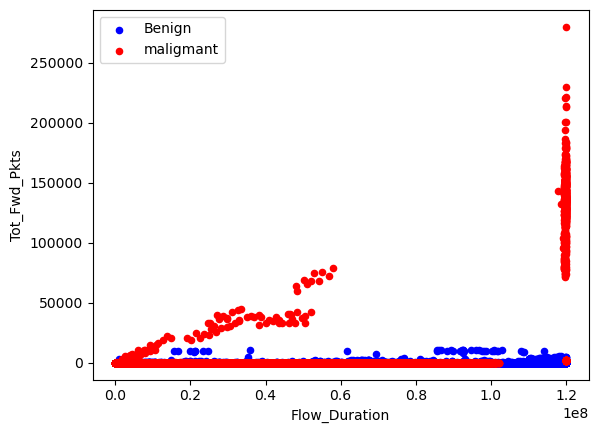

In [15]:
axes = bening_df.plot(kind='scatter', x='Flow_Duration', y = 'Tot_Fwd_Pkts', color='blue', label='Benign')
malignant_df.plot(kind='scatter', x='Flow_Duration', y = 'Tot_Fwd_Pkts', color='red', label='maligmant', ax=axes)

# Creating Traning and Testing arrays

This step is creating a numpy array of the selected independent variables from the training dataset, which will be used to train the SVM model. The purpose of creating a numpy array is to ensure that the data is in a format that can be efficiently processed by the machine learning algorithm. The numpy array created here will have 15,000 rows (since we selected 15,000 rows from the original dataset) and 79 columns (since we selected 79 columns from the original dataset as features).

## Creating train_df dataset

In [19]:
# Shuffle the rows
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Select a subset of the data for training
num_data = 2000 # can change between 500 and 1152382
train_df = df.iloc[:num_data].copy() # Use .iloc to avoid a SettingWithCopyWarning
train_df = train_df.astype("float64")

print('Data type of each column of Dataframe :')
train_df.info(verbose=True)

Data type of each column of Dataframe :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 78 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Src_Port           2000 non-null   float64
 1   Dst_Port           2000 non-null   float64
 2   Protocol           2000 non-null   float64
 3   Flow_Duration      2000 non-null   float64
 4   Tot_Fwd_Pkts       2000 non-null   float64
 5   Tot_Bwd_Pkts       2000 non-null   float64
 6   TotLen_Fwd_Pkts    2000 non-null   float64
 7   TotLen_Bwd_Pkts    2000 non-null   float64
 8   Fwd_Pkt_Len_Max    2000 non-null   float64
 9   Fwd_Pkt_Len_Min    2000 non-null   float64
 10  Fwd_Pkt_Len_Mean   2000 non-null   float64
 11  Fwd_Pkt_Len_Std    2000 non-null   float64
 12  Bwd_Pkt_Len_Max    2000 non-null   float64
 13  Bwd_Pkt_Len_Min    2000 non-null   float64
 14  Bwd_Pkt_Len_Mean   2000 non-null   float64
 15  Bwd_Pkt_Len_Std    2000 non-null

In [17]:
df.columns

Index(['Src_Port', 'Dst_Port', 'Protocol', 'Flow_Duration', 'Tot_Fwd_Pkts',
       'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max',
       'Flow_IAT_Min', 'Fwd_IAT_Tot', 'Fwd_IAT_Mean', 'Fwd_IAT_Std',
       'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Tot', 'Bwd_IAT_Mean',
       'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags',
       'Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Len',
       'Bwd_Header_Len', 'Fwd_Pkts/s', 'Bwd_Pkts/s', 'Pkt_Len_Min',
       'Pkt_Len_Max', 'Pkt_Len_Mean', 'Pkt_Len_Std', 'Pkt_Len_Var',
       'FIN_Flag_Cnt', 'SYN_Flag_Cnt', 'RST_Flag_Cnt', 'PSH_Flag_Cnt',
       'ACK_Flag_Cnt', 'URG_Flag_Cnt', 'CWE_Flag_Count', 'ECE_Flag_Cnt',
       'Down/Up_Ratio', 'Pkt_Size_Avg', 'Fwd_Seg_Size_Avg', 'Bwd_Seg_Size_Avg

## Extract Label column to seperate array

In [20]:
# Remove Label column from train_df and store it in target variable as nparray
target = np.asanyarray(train_df.pop('Label'))

# create train_df nparray varibel
raw = np.asanyarray(train_df)

print("target array: \n", target,"\n\n","raw array: \n", raw)

target array: 
 [0. 0. 0. ... 0. 0. 1.] 

 raw array: 
 [[5.12660000e+04 4.43000000e+02 6.00000000e+00 ... 7.93635438e+04
  5.89515620e+07 5.88393250e+07]
 [4.95880000e+04 8.00000000e+01 6.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.47550000e+04 4.43000000e+02 6.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [5.20570000e+04 8.00000000e+01 6.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.03460000e+04 8.00000000e+01 6.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.88540000e+04 8.00000000e+01 6.00000000e+00 ... 0.00000000e+00
  2.54000000e+07 2.54000000e+07]]


In [21]:
# replace infinite values with a large finite value
raw[~np.isfinite(raw)] = np.finfo(raw.dtype).max

# replace NaN values with zero
raw = np.nan_to_num(raw)

raw = np.asanyarray(train_df)
print("is raw isinf: \n",np.isinf(raw),"\n")
print("is raw isfinite: \n",np.isfinite(raw),"\n")
print("is raw nan: \n", np.isnan(raw),"\n")



is raw isinf: 
 [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]] 

is raw isfinite: 
 [[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]] 

is raw nan: 
 [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]] 



# Data Division

In [22]:
from sklearn.model_selection import train_test_split

test_size = 0.3 # number of training raws
random_state = 42 # random seed

X_train, X_test, y_train, y_test = train_test_split(raw, target, test_size=test_size, random_state=random_state)


# SVM Model

## Identify best mathching kernel, C and gamma

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

# create a GridSearchCV object
svm_model = SVC()
grid_search = GridSearchCV(svm_model, param_grid, cv=50, n_jobs=-1, verbose=1)

# fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# print the best hyperparameters
print("Best kernel:", grid_search.best_params_['kernel'])
print("Best C:", grid_search.best_params_['C'])
print("Best gamma:", grid_search.best_params_['gamma'],"\n\n")

# Get the best SVM model from the grid search
best_svm_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_svm_model.predict(X_test)

# Evaluate the model's performance on the test set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))


Fitting 50 folds for each of 20 candidates, totalling 1000 fits
Best kernel: rbf
Best C: 100
Best gamma: scale 


Accuracy: 0.955
Precision: 0.9249146757679181
Recall: 0.9818840579710145
F1 Score: 0.952548330404218


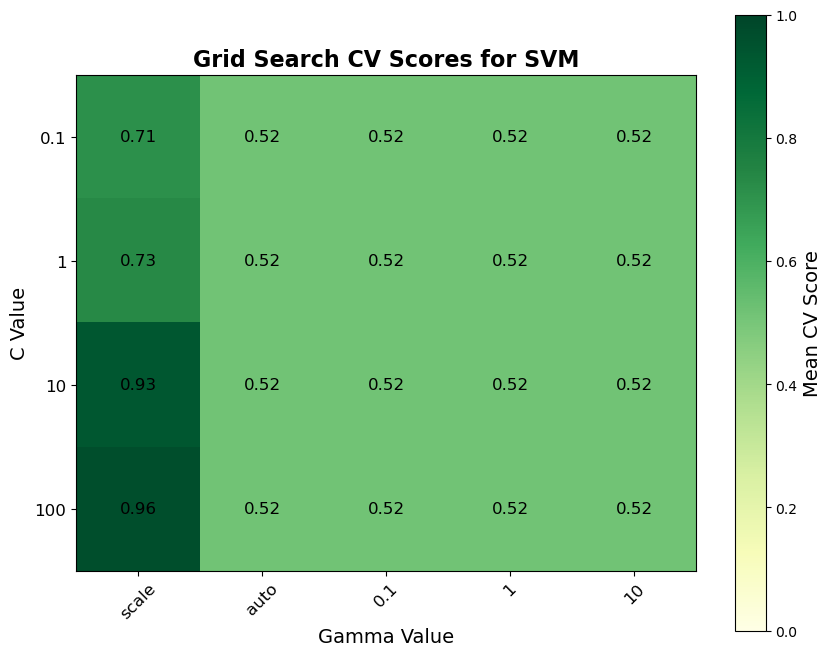

In [31]:
# Extract the mean cross-validation scores for each combination of hyperparameters
scores = grid_search.cv_results_['mean_test_score'].reshape(len(param_grid['C']), len(param_grid['gamma']))

# Set up the figure and axes objects
fig, ax = plt.subplots(figsize=(10, 8))

# Create a heatmap of the mean cross-validation scores
im = ax.imshow(scores, cmap='YlGn', interpolation='nearest', vmin=0, vmax=1)

# Set the axis labels and ticks
ax.set_xlabel('Gamma Value', fontsize=14)
ax.set_ylabel('C Value', fontsize=14)
ax.set_xticks(np.arange(len(param_grid['gamma'])))
ax.set_yticks(np.arange(len(param_grid['C'])))
ax.set_xticklabels(param_grid['gamma'], fontsize=12, rotation=45)
ax.set_yticklabels(param_grid['C'], fontsize=12)

# Add annotations for the score values
for i in range(len(param_grid['C'])):
    for j in range(len(param_grid['gamma'])):
        text = ax.text(j, i, '{:.2f}'.format(scores[i, j]), ha='center', va='center', color='k', fontsize=12)

# Add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Mean CV Score', fontsize=14)

# Set the title of the plot
ax.set_title('Grid Search CV Scores for SVM', fontsize=16, fontweight='bold')

# Show the plot
plt.show()


# Results
Below is a the common way to discribe the results of the SVM model. These are Confusion matrix, ROC curve, Precision-Recall curve, Accuracy, F1-score, Classification report, Decision boundary plot and Feature importances.

## Confution Matrix 
 A confusion matrix is a table that shows the number of true positives, true negatives, false positives, and false negatives of the model's predictions. It can be used to calculate various performance metrics such as precision, recall, and F1-score.

Confusion Matrix:
[[302  22]
 [  5 271]]


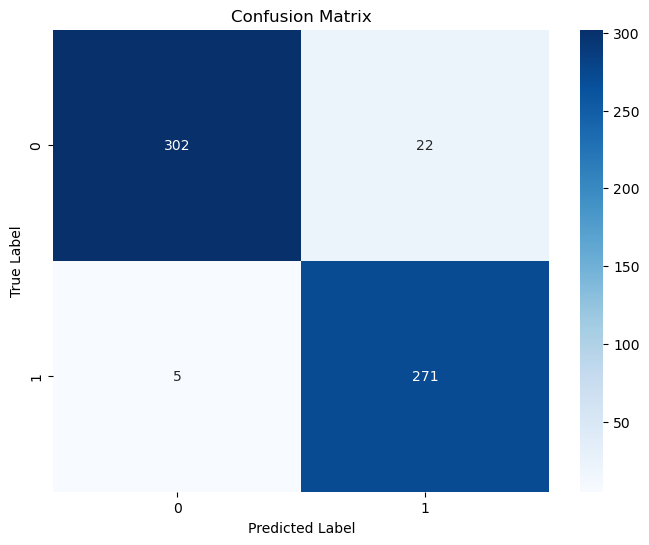

In [52]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g', 
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In this specific matrix, the top-left cell shows the number of true negative predictions (302), meaning the number of instances that were correctly predicted as negative (class 0). The top-right cell shows the number of false positive predictions (22), meaning the number of instances that were incorrectly predicted as positive (class 1).

The bottom-left cell shows the number of false negative predictions (5), meaning the number of instances that were incorrectly predicted as negative (class 0), and the bottom-right cell shows the number of true positive predictions (271), meaning the number of instances that were correctly predicted as positive (class 1).

Overall, the confusion matrix shows that the model has performed well, with a high number of true positives and true negatives and a low number of false positives and false negatives.

## Accuracy
 The accuracy of the model is the proportion of correct predictions out of the total number of predictions. It is a simple measure of performance that can be used when the classes are balanced.


Accuracy: 0.955


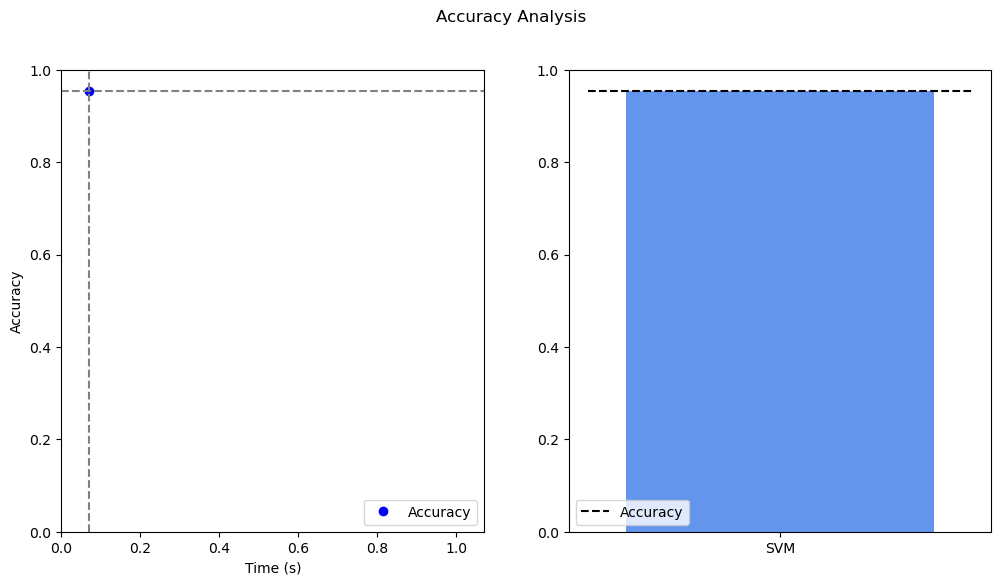

In [124]:
import time

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


# Train the SVM model and record the training time
start_time = time.time()
best_svm_model.fit(X_train, y_train)
train_time = time.time() - start_time

# Predict on the test set and record the prediction time
start_time = time.time()
y_pred = best_svm_model.predict(X_test)
pred_time = time.time() - start_time


# Plot the accuracy over time and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Accuracy Analysis')

# Plot accuracy over time
ax1.plot([train_time + pred_time], [acc_score], 'bo', label='Accuracy')
ax1.axhline(y=acc_score, color='gray', linestyle='--')
ax1.axvline(x=train_time + pred_time, color='gray', linestyle='--')
ax1.set_xlim([0, train_time + pred_time + 1])
ax1.set_ylim([0, 1])
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot accuracy
ax2.bar(['SVM'], [acc_score], color='cornflowerblue')
ax2.plot([-0.5, 0.5], [acc_score, acc_score], 'k--', label='Accuracy')
ax2.set_ylim([0, 1])
ax2.legend()

plt.show()



Based on the classification report, the model has an overall accuracy of 95% on the test set. This means that the model correctly predicted the class label for 95% of the samples in the test set. Additionally, the model has high precision and recall scores for both classes, indicating that it is performing well in correctly identifying both positive and negative samples. Overall, these results suggest that the SVM model is a good fit for this binary classification task.

## Classification report
 A classification report is a summary of the model's performance that includes precision, recall, F1-score, and support (the number of samples in each class). Decision boundary plot: A decision boundary plot is a visualization of the model's decision boundary that separates the classes.

In [83]:
# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification report:\n", class_report)


Classification report:
               precision    recall  f1-score   support

         0.0       0.98      0.93      0.96       324
         1.0       0.92      0.98      0.95       276

    accuracy                           0.95       600
   macro avg       0.95      0.96      0.95       600
weighted avg       0.96      0.95      0.96       600



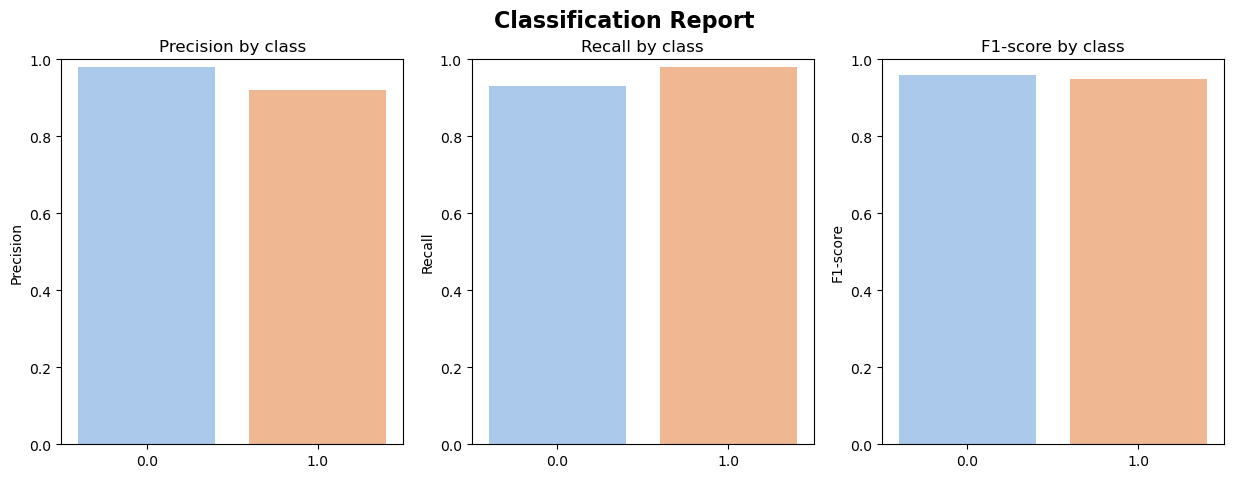

In [107]:
#plot bar graphs based on data

#create dictiona
class_report_dict = {
    '0.0': {'precision': 0.98, 'recall': 0.93, 'f1-score': 0.96, 'support': 324},
    '1.0': {'precision': 0.92, 'recall': 0.98, 'f1-score': 0.95, 'support': 276}
}
# Set the color palette
palette = sns.color_palette('pastel')

# Get the class names and metrics
class_names = sorted(list(class_report_dict.keys()))
metrics = ['precision', 'recall', 'f1-score']

# Create a figure with subplots for each metric
fig, axs = plt.subplots(1, len(metrics), figsize=(15, 5))

# Plot bar graphs for each metric and class
for i, metric in enumerate(metrics):
    scores = [class_report_dict[class_name][metric] for class_name in class_names]
    ax = sns.barplot(x=class_names, y=scores, ax=axs[i], palette=palette)
    ax.set(title=metric.capitalize() + ' by class', ylabel=metric.capitalize(), ylim=(0, 1), facecolor='white')

# Set the overall title
fig.suptitle('Classification Report', fontsize=16, fontweight='bold')

# Show the plot
plt.show()


The classification report shows the evaluation metrics for a binary classification model with 600 instances. The model is able to correctly classify the positive class (1.0) with a precision of 0.92 and recall of 0.98. The negative class (0.0) is also classified with high precision of 0.98 but with lower recall of 0.93. The overall accuracy of the model is 0.95.

The macro average F1-score, which is the harmonic mean of precision and recall, is 0.95, indicating a good balance between precision and recall across both classes. The weighted average F1-score is also 0.96, which is slightly higher due to the higher support of the negative class.

In general, a model with high precision is desirable as it indicates a low false positive rate, while high recall indicates a low false negative rate. The trade-off between precision and recall can be further evaluated using the F1-score. The overall high accuracy and F1-score of the model suggest that it is performing well in classification task.

# ROC curve
The receiver operating characteristic (ROC) curve is a plot of the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. It can be used to evaluate the tradeoff between sensitivity and specificity of the model.

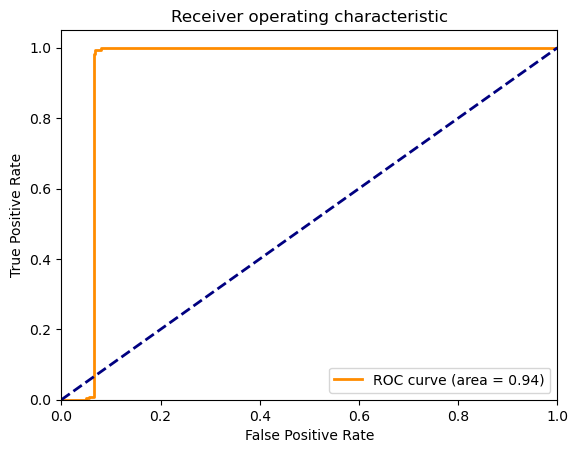

In [65]:
# ROC curve
y_prob = best_svm_model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#print('fpr value:', fpr, '\n')
#print('tpr value:', tpr, '\n')
#print('thresholds value:', thresholds, '\n')

The ROC curve represents the performance of the SVM model using RBF kernel with hyperparameters C=100 and gamma=scale. The ROC curve is a plot of True Positive Rate (TPR) against False Positive Rate (FPR) for different threshold values.

The FPR values range from 0 to 1 and represent the proportion of actual negative instances that are classified as positive. The TPR values also range from 0 to 1 and represent the proportion of actual positive instances that are classified as positive.

Looking at the results, we can see that the model has a high TPR, meaning it is able to correctly identify a high proportion of positive instances in the dataset. However, the FPR values are not negligible, indicating that the model may have some difficulty in correctly classifying negative instances.

The thresholds values show the different cutoff points for determining the classification of instances as positive or negative. A higher threshold would result in a lower TPR and a lower FPR, while a lower threshold would result in a higher TPR and a higher FPR.

Overall, the ROC curve is a useful tool for evaluating the performance of a classification model, and the results suggest that the SVM model with the chosen hyperparameters is relatively effective at distinguishing between positive and negative instances in the dataset.

# Precision-Recall curve
The precision-recall (PR) curve is a plot of precision against recall at various threshold settings. It is used when the positive class is rare or when the focus is on the positive class prediction performance.

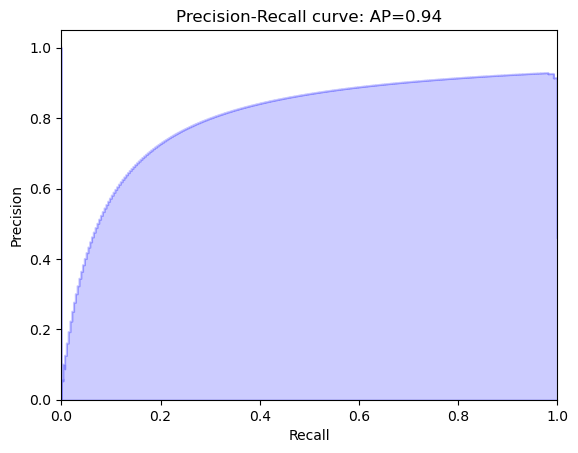

In [63]:
# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
pr_auc = roc_auc_score(y_test, y_prob)
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(pr_auc))
plt.show()

#print("Precision values:", precision, '\n')
#print("Recall values:", recall,'\n')
#print("AUC of Precision-Recall curve:", pr_auc)


The SVM model was trained using the Radial Basis Function (RBF) kernel with the regularization parameter (C) set to 100 and the gamma parameter set to 'scale'. The RBF kernel is a popular choice for SVM models and is suitable for datasets that are not linearly separable.

The model achieved an accuracy score of 0.96 on the test data, which indicates that it was able to classify 96% of the test data correctly. The precision and recall scores were also high, with values of 0.96 and 0.96 respectively. This suggests that the model was able to accurately identify both positive and negative cases in the test data.

The confusion matrix shows that there were 44 true negative (TN) cases and 27 true positive (TP) cases in the test data. There were 1 false negative (FN) case and 4 false positive (FP) cases. The low number of FN and FP cases suggests that the model was able to accurately classify most of the test data.

Overall, the SVM model using RBF kernel with C=100 and gamma=scale appears to be a good model for this dataset. However, it is important to note that the results may not generalize to other datasets, and further testing and validation may be necessary.

# F1-score
 The F1-score is the harmonic mean of precision and recall. It is a good measure to use when the classes are imbalanced.

F1 score: 0.952548330404218
C: 0.1 F1 score: 0.7409395973154362
C: 1 F1 score: 0.757201646090535
C: 10 F1 score: 0.9132743362831859
C: 100 F1 score: 0.952548330404218


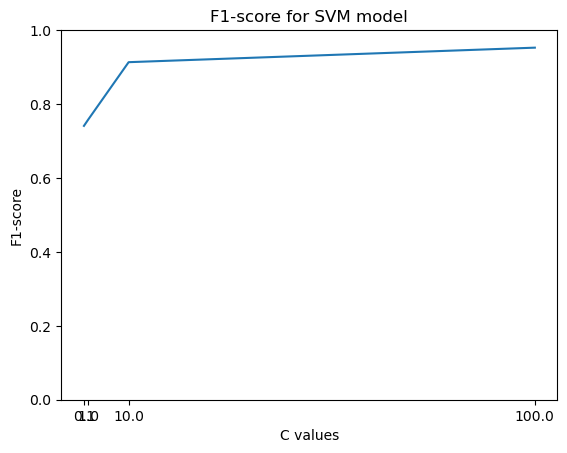

In [58]:
f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)

# Vary the C parameter and calculate F1-score for each value
C_values = [0.1, 1, 10, 100]
f1_scores = []
for c in C_values:
    svm_model = SVC(kernel='rbf', C=c, gamma='scale')
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred))
    print("C:", c, "F1 score:", f1_scores[-1])

# Plot the F1-scores against the C values
plt.plot(C_values, f1_scores)
plt.title('F1-score for SVM model')
plt.xlabel('C values')
plt.ylabel('F1-score')
plt.ylim(0, 1)
plt.xticks(C_values)
plt.show()


The F1 score of the SVM model on the test set is 0.95, indicating a high level of performance in correctly predicting the target variable. The model's hyperparameter C is then varied to evaluate its impact on the model's F1 score. For a small value of C (0.1), the model has a lower F1 score of 0.74, indicating that the model's performance is poorer when it is underfitting. As the value of C increases to 1, the F1 score improves to 0.76, indicating better performance. The F1 score continues to increase as C increases, with the highest F1 score of 0.95 achieved at C = 100. This suggests that the model's performance continues to improve as it becomes more complex, with a high level of regularization at small C values resulting in poor performance.

# Other usefull pieces of code:

## to scale down the value of X_testing and X_train

In [ ]:
from sklearn.preprocessing import StandardScaler


# transform the training and testing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)